## Classification Model for Original Data

In [43]:
#import some standard Libraries
import pandas as pd
from pandas.tools.plotting import boxplot
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
    
directory = 'C:/python_Files/MSDS7349_DataSecurity/Project/data/'
df_MERGED2015_16 = pd.read_csv(directory + 'MERGED2015_16_PP.csv',low_memory=False) # read in the csv file

selected_columns = ['UNITID','CONTROL','ST_FIPS','REGION','LOCALE','CCBASIC','CCSIZSET','ADM_RATE','SAT_AVG','UGDS','COSTT4_A','TUITIONFEE_IN','TUITIONFEE_OUT','AVGFACSAL','PFTFAC','PCTFLOAN','DEP_INC_AVG','IND_INC_AVG','D_PCTPELL_PCTFLOAN']

#'GRADS'，'ACTCMMID','ACTENMID','ACTMTMID','D150_4','ACCREDCODE','INSTNM','CITY','ZIP','AGE_ENTRY','MAIN','OPENADMP'


In [44]:
df_scorecard =  df_MERGED2015_16[selected_columns]
df_scorecard.dropna(axis=0, how='all', thresh=None, subset=['ADM_RATE'],inplace = True)
df_scorecard.dropna(axis=0, how='all', thresh=None, subset=['SAT_AVG'],inplace = True)
df_scorecard.dropna(axis=0, how='all', thresh=None, subset=['COSTT4_A'],inplace = True)
df_scorecard.dropna(axis=0, how='all', thresh=None, subset=['AVGFACSAL'],inplace = True)
df_scorecard.dropna(axis=0, how='all', thresh=None, subset=['PFTFAC'],inplace = True)


df_scorecard = df_scorecard[df_scorecard.DEP_INC_AVG != 'PrivacySuppressed']
df_scorecard = df_scorecard[df_scorecard.IND_INC_AVG != 'PrivacySuppressed']

df_scorecard.DEP_INC_AVG = df_scorecard.DEP_INC_AVG.astype(str).astype(float)
df_scorecard.IND_INC_AVG = df_scorecard.IND_INC_AVG.astype(str).astype(float)

# Write to local as csv format. Commented out for now, but here as a placeholder for us to use sometimes. 
#df_scorecard.to_csv(directory + 'df_scorecard.csv', sep=',', index=False)
df_scorecard.info()
df_scorecard.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 7136
Data columns (total 19 columns):
UNITID                1205 non-null int64
CONTROL               1205 non-null int64
ST_FIPS               1205 non-null int64
REGION                1205 non-null int64
LOCALE                1205 non-null float64
CCBASIC               1205 non-null float64
CCSIZSET              1205 non-null float64
ADM_RATE              1205 non-null float64
SAT_AVG               1205 non-null float64
UGDS                  1205 non-null float64
COSTT4_A              1205 non-null float64
TUITIONFEE_IN         1205 non-null float64
TUITIONFEE_OUT        1205 non-null float64
AVGFACSAL             1205 non-null float64
PFTFAC                1205 non-null float64
PCTFLOAN              1205 non-null float64
DEP_INC_AVG           1205 non-null float64
IND_INC_AVG           1205 non-null float64
D_PCTPELL_PCTFLOAN    1205 non-null float64
dtypes: float64(15), int64(4)
memory usage: 188.3 KB


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\xiaon\Anaconda3\lib\

,count,mean,std,min,25%,50%,75%,max
UNITID,1205.0,188809.281328,57613.254233,100654.000000,153278.000000,186584.000000,215929.000000,487524.000000
CONTROL,1205.0,1.585892,0.504432,1.000000,1.000000,2.000000,2.000000,3.000000
ST_FIPS,1205.0,30.312863,15.103053,1.000000,18.000000,31.000000,42.000000,78.000000
REGION,1205.0,4.169295,1.946004,1.000000,3.000000,4.000000,5.000000,9.000000
LOCALE,1205.0,20.548548,9.685606,11.000000,12.000000,21.000000,32.000000,43.000000
CCBASIC,1205.0,18.819917,4.169969,-3.000000,18.000000,19.000000,22.000000,33.000000
CCSIZSET,1205.0,11.608299,3.286830,-2.000000,10.000000,11.000000,14.000000,17.000000
ADM_RATE,1205.0,0.662950,0.186794,0.050400,0.554300,0.680600,0.792800,1.000000
SAT_AVG,1205.0,1048.552697,127.737090,708.000000,969.000000,1034.000000,1109.000000,1507.000000
UGDS,1205.0,5850.506224,7672.533082,45.000000,1286.000000,2633.000000,6994.000000,54091.000000


In [45]:
df_class = df_scorecard.copy()
#  1: Collage Admission Percentage greater than 50%; 
#  0: Collage Admission Percentage less than or equal to 50%;

def f(row):
    if row['ADM_RATE'] > 0.5:
        val = 1
    else:
        val = 0
    return val

df_class['Binary_ADM_RATE'] = df_scorecard.apply(f, axis=1)

#df_class.to_csv(directory + 'df_class.csv', sep=',', index=False)

df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 7136
Data columns (total 20 columns):
UNITID                1205 non-null int64
CONTROL               1205 non-null int64
ST_FIPS               1205 non-null int64
REGION                1205 non-null int64
LOCALE                1205 non-null float64
CCBASIC               1205 non-null float64
CCSIZSET              1205 non-null float64
ADM_RATE              1205 non-null float64
SAT_AVG               1205 non-null float64
UGDS                  1205 non-null float64
COSTT4_A              1205 non-null float64
TUITIONFEE_IN         1205 non-null float64
TUITIONFEE_OUT        1205 non-null float64
AVGFACSAL             1205 non-null float64
PFTFAC                1205 non-null float64
PCTFLOAN              1205 non-null float64
DEP_INC_AVG           1205 non-null float64
IND_INC_AVG           1205 non-null float64
D_PCTPELL_PCTFLOAN    1205 non-null float64
Binary_ADM_RATE       1205 non-null int64
dtypes: float64(15), in

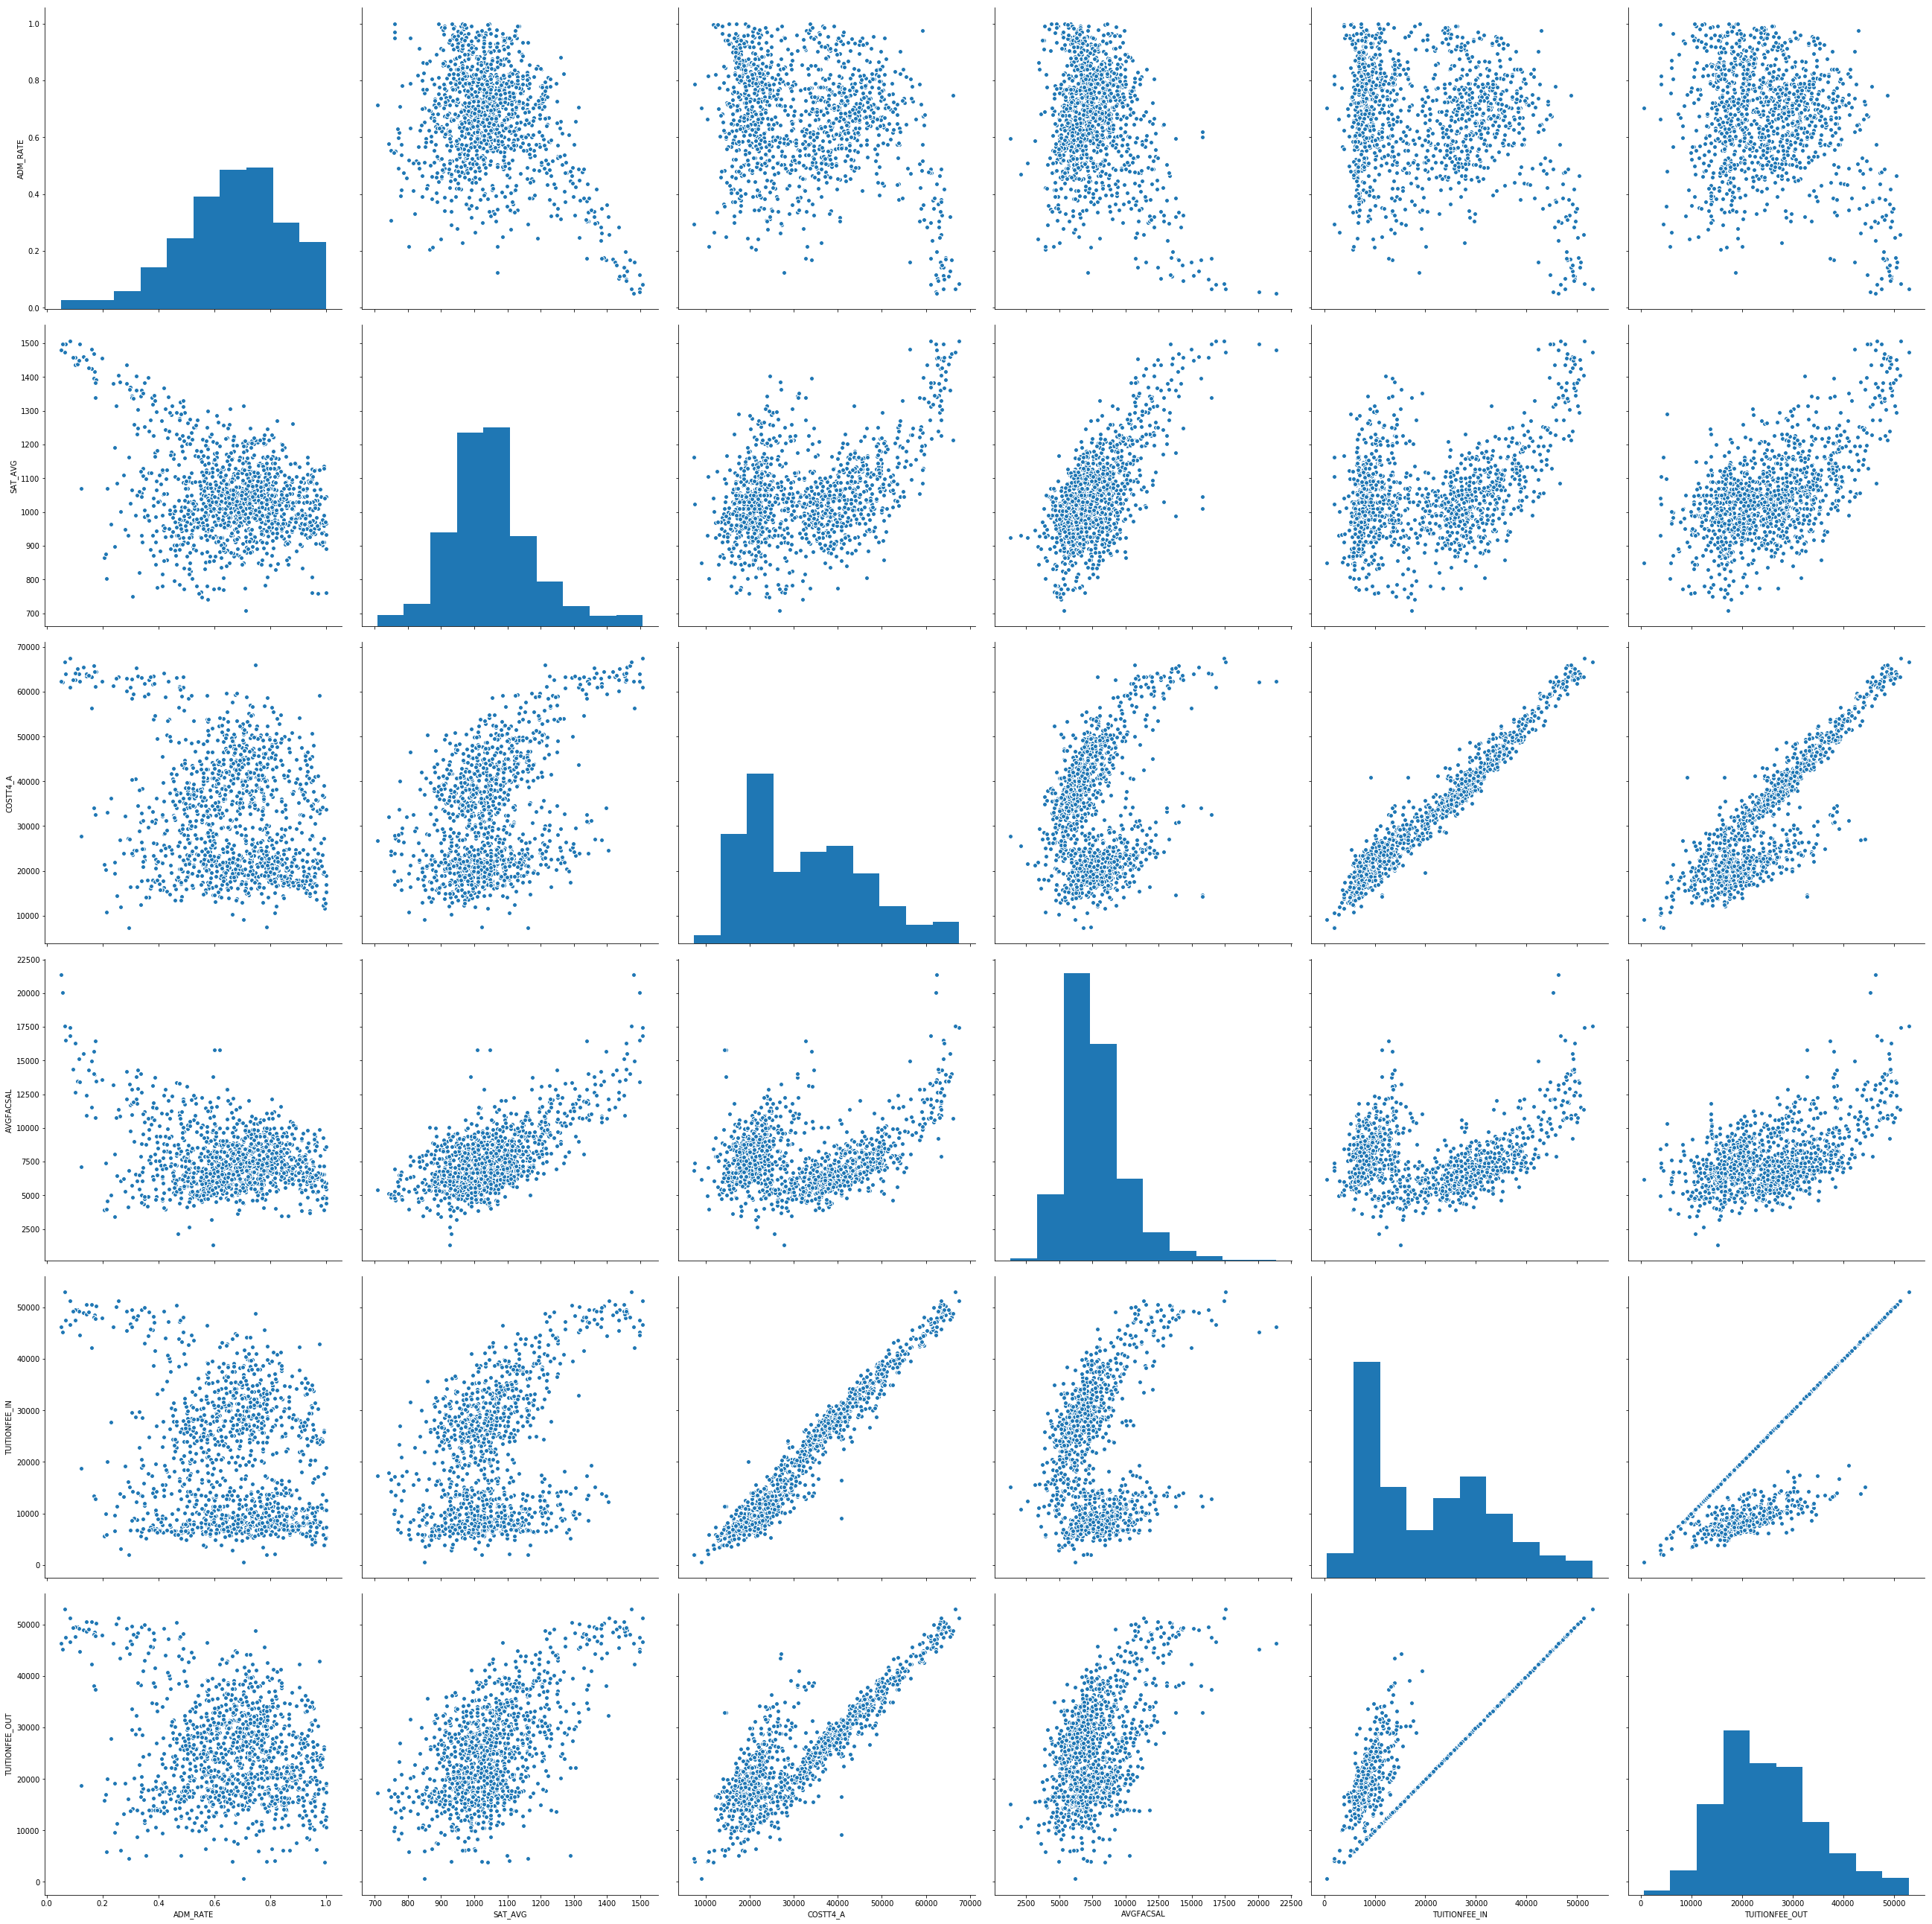

In [46]:
# Prepare data subset for plotting. Chooseing related Variables

sns.pairplot(df_class, vars=['ADM_RATE','SAT_AVG','COSTT4_A','AVGFACSAL','TUITIONFEE_IN','TUITIONFEE_OUT'], size=6)

In [47]:
# Prepare Classification pipeline
class_y = df_class.Binary_ADM_RATE
class_X = df_class.drop(['ADM_RATE','Binary_ADM_RATE'], axis=1) # axis = 1 -  column
class_y.value_counts()

1    989
0    216
Name: Binary_ADM_RATE, dtype: int64

In [48]:
#  Classification Splits
from sklearn.model_selection import train_test_split
class_X_train, class_X_test, class_Y_train, class_Y_test = train_test_split(class_X, class_y, test_size=0.20, stratify=class_y, random_state=1)

In [49]:
from sklearn.preprocessing import StandardScaler

# Normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scaler = StandardScaler()
scaler.fit(class_X_train) # find scalings for each column that make this zero mean and unit std

class_X_train = scaler.transform(class_X_train) # apply to training
class_X_test = scaler.transform(class_X_test) # apply those means and std to the test set (without snooping at the test set values)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score


clf_rf = RandomForestClassifier(random_state=1)
rf_model = clf_rf.fit(class_X_train, class_Y_train)

rf_predictions = rf_model.predict(class_X_test)

print("Random Forests Accuracy for original data\n", accuracy_score(class_Y_test, rf_predictions))
print("Random Forests F1 score for original data\n", f1_score(class_Y_test, rf_predictions))
print("Random Forests Confusion Matrix for original data\n", confusion_matrix(class_Y_test, rf_predictions))

Random Forests Accuracy for original data
 0.8547717842323651
Random Forests F1 score for original data
 0.9148418491484185
Random Forests Confusion Matrix for original data
 [[ 18  25]
 [ 10 188]]


In [51]:
rf_TN=float(confusion_matrix(class_Y_test, rf_predictions)[0,0])
rf_TP=float(confusion_matrix(class_Y_test, rf_predictions)[1,1])
rf_FN=float(confusion_matrix(class_Y_test, rf_predictions)[1,0])
rf_FP=float(confusion_matrix(class_Y_test, rf_predictions)[0,1])
rf_TPR=rf_TP/(rf_TP+rf_FN)
rf_TNR=rf_TN/(rf_TN+rf_FP)
rf_PPV=rf_TP/(rf_TP+rf_FP)
rf_ACC=(rf_TP+rf_TN)/(rf_TP+rf_TN+rf_FP+rf_FN)
rf_ERR=(rf_FP+rf_FN)/(rf_TP+rf_TN+rf_FP+rf_FN) 
rf_F1=(2*rf_TP)/((2*rf_TP)+rf_FP+rf_FN) 

In [52]:
zip_vars=pd.DataFrame()
zip_vars['column name']=class_X.columns
zip_vars['weight']=rf_model.feature_importances_

# sort by weight and reset index of zip_vars
zip_vars = zip_vars.sort_values('weight',ascending=False)
zip_vars.reset_index(drop=True,inplace=True)
print(zip_vars)

           column name    weight
0              SAT_AVG  0.145219
1             COSTT4_A  0.112661
2       TUITIONFEE_OUT  0.106371
3          DEP_INC_AVG  0.090433
4             PCTFLOAN  0.081873
5          IND_INC_AVG  0.062084
6        TUITIONFEE_IN  0.058356
7            AVGFACSAL  0.054315
8   D_PCTPELL_PCTFLOAN  0.048110
9               UNITID  0.047623
10                UGDS  0.042687
11              PFTFAC  0.031059
12              LOCALE  0.027670
13             ST_FIPS  0.026179
14             CCBASIC  0.022727
15              REGION  0.021340
16            CCSIZSET  0.012943
17             CONTROL  0.008351


## Classification Model for Anonymized Data

In [53]:
df_class_a = pd.read_csv(directory + 'df_class_anaonymized_7.csv',low_memory=False) # read in the csv file

In [54]:
# Create number variables for anonymized SAT_AVG

#df_class_a.SAT_AVG.unique()

levels = df_class_a.SAT_AVG.unique()
df_class_a['SAT_AVG_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.SAT_AVG_NUM[df_class_a.SAT_AVG==levels[i]] = i+1

df_class_a.SAT_AVG_NUM.unique()

[1200, 1600[
[400, 800[
[800, 1200[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


array([1, 2, 3, 0], dtype=int64)

In [55]:
# Create number variables for anonymized TUITIONFEE_IN 

# df_class_a.TUITIONFEE_IN.unique()

levels = df_class_a.TUITIONFEE_IN.unique()
df_class_a['TUITIONFEE_IN_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.TUITIONFEE_IN_NUM[df_class_a.TUITIONFEE_IN==levels[i]] = i+1
        

df_class_a.TUITIONFEE_IN_NUM.unique()

[0, 12000[
[12000, 24000[
[24000, 36000[
[36000, 48000[
[48000, 54000[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


array([1, 2, 3, 4, 5, 0], dtype=int64)

In [56]:
# Create number variables for anonymized TUITIONFEE_OUT

#df_class_a.TUITIONFEE_OUT.unique()

levels = df_class_a.TUITIONFEE_OUT.unique()
df_class_a['TUITIONFEE_OUT_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.TUITIONFEE_OUT_NUM[df_class_a.TUITIONFEE_OUT==levels[i]] = i+1
        
df_class_a.TUITIONFEE_OUT_NUM.unique()

[18000, 36000[
[36000, 54000[
[0, 18000[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


array([1, 2, 3, 0], dtype=int64)

In [57]:
# Create number variables for anonymized AVGFACSAL

levels = df_class_a.AVGFACSAL.unique()
df_class_a['AVGFACSAL_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.AVGFACSAL_NUM[df_class_a.AVGFACSAL==levels[i]] = i+1
        
df_class_a.AVGFACSAL_NUM.unique()

[8000, 16000[
[1000, 8000[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([1, 2, 0], dtype=int64)

In [58]:
# Create number variables for anonymized COSTT4_A

levels = df_class_a.COSTT4_A.unique()
df_class_a['COSTT4_A_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.COSTT4_A_NUM[df_class_a.COSTT4_A==levels[i]] = i+1
        
df_class_a.COSTT4_A_NUM.unique()

[20000, 40000[
[40000, 60000[
[60000, 70000[
[7000, 20000[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([1, 2, 3, 4, 0], dtype=int64)

In [59]:
# Create number variables for anonymized DEP_INC_AVG

levels = df_class_a.DEP_INC_AVG.unique()
df_class_a['DEP_INC_AVG_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.DEP_INC_AVG_NUM[df_class_a.DEP_INC_AVG==levels[i]] = i+1
        
df_class_a.COSTT4_A_NUM.unique()

[60000, 90000[
[90000, 120000[
[120000, 150000[
[30000, 60000[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[15000, 30000[


array([1, 2, 3, 4, 0], dtype=int64)

In [60]:
# Create number variables for anonymized IND_INC_AVG

levels = df_class_a.IND_INC_AVG.unique()
df_class_a['IND_INC_AVG_NUM'] = 0

for i in range(0,len(levels)):
    if(levels[i]!='*'):
        print(levels[i])
        df_class_a.IND_INC_AVG_NUM[df_class_a.IND_INC_AVG==levels[i]] = i+1
        
df_class_a.IND_INC_AVG_NUM.unique()

[2000, 40000[
[40000, 60000[


C:\Users\xiaon\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([1, 2, 0], dtype=int64)

In [61]:
df_class_a.DEP_INC_AVG = df_scorecard.DEP_INC_AVG.astype(str).astype(float)
df_class_a.IND_INC_AVG = df_scorecard.IND_INC_AVG.astype(str).astype(float)

df_class_a.info()
df_class_a.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 29 columns):
UNITID                1205 non-null int64
MAIN                  1205 non-null int64
CONTROL               1205 non-null int64
ST_FIPS               1205 non-null int64
REGION                1205 non-null int64
LOCALE                1205 non-null float64
CCBASIC               1205 non-null float64
CCSIZSET              1205 non-null float64
ADM_RATE              1205 non-null float64
SAT_AVG               1205 non-null object
UGDS                  1205 non-null float64
COSTT4_A              1205 non-null object
TUITIONFEE_IN         1205 non-null object
TUITIONFEE_OUT        1205 non-null object
AVGFACSAL             1205 non-null object
PFTFAC                1205 non-null float64
PCTFLOAN              1205 non-null float64
DEP_INC_AVG           297 non-null float64
IND_INC_AVG           297 non-null float64
OPENADMP              1205 non-null float64
D_PCTPELL_PCTFLOAN    1205 non

,count,mean,std,min,25%,50%,75%,max
UNITID,1205.0,188809.281328,57613.254233,100654.000000,153278.000000,186584.000000,215929.000000,487524.000000
MAIN,1205.0,0.962656,0.189683,0.000000,1.000000,1.000000,1.000000,1.000000
CONTROL,1205.0,1.585892,0.504432,1.000000,1.000000,2.000000,2.000000,3.000000
ST_FIPS,1205.0,30.312863,15.103053,1.000000,18.000000,31.000000,42.000000,78.000000
REGION,1205.0,4.169295,1.946004,1.000000,3.000000,4.000000,5.000000,9.000000
LOCALE,1205.0,20.548548,9.685606,11.000000,12.000000,21.000000,32.000000,43.000000
CCBASIC,1205.0,18.819917,4.169969,-3.000000,18.000000,19.000000,22.000000,33.000000
CCSIZSET,1205.0,11.608299,3.286830,-2.000000,10.000000,11.000000,14.000000,17.000000
ADM_RATE,1205.0,0.662950,0.186794,0.050400,0.554300,0.680600,0.792800,1.000000
UGDS,1205.0,5850.506224,7672.533082,45.000000,1286.000000,2633.000000,6994.000000,54091.000000


In [62]:
# Prepare Classification pipeline
class_y_a = df_class_a.Binary_ADM_RATE
class_X_a = df_class_a.drop(['ADM_RATE','Binary_ADM_RATE','SAT_AVG','TUITIONFEE_IN','TUITIONFEE_OUT','COSTT4_A','AVGFACSAL','DEP_INC_AVG','IND_INC_AVG'], axis=1) # axis = 1 -  column
class_y_a.value_counts()

1    989
0    216
Name: Binary_ADM_RATE, dtype: int64

In [63]:
#  Classification Splits
from sklearn.model_selection import train_test_split
class_X_a_train, class_X_a_test, class_Y_a_train, class_Y_a_test = train_test_split(class_X_a, class_y_a, test_size=0.20, stratify=class_y_a, random_state=1)

In [64]:
from sklearn.preprocessing import StandardScaler

# Normalize the features based upon the mean and standard deviation of each column. 

# scale attributes by the training set
scaler = StandardScaler()
scaler.fit(class_X_a_train) # find scalings for each column that make this zero mean and unit std

class_X_a_train = scaler.transform(class_X_a_train) # apply to training
class_X_a_test = scaler.transform(class_X_a_test) # apply those means and std to the test set (without snooping at the test set values)

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

rf_model_a = clf_dt.fit(class_X_a_train, class_Y_a_train)

rf_predictions_a = dt_model_a.predict(class_X_a_test)

print("Random Forests Accuracy for anonimized data\n", accuracy_score(class_Y_a_test, dt_predictions_a))
print("Random Forests F1 Score for anonimized data\n", f1_score(class_Y_a_test, dt_predictions_a))
print("Random Forests Confusion Matrix for anonimized data\n", confusion_matrix(class_Y_a_test, dt_predictions_a))

Random Forests Accuracy for anonimized data
 0.8381742738589212
Random Forests F1 Score for anonimized data
 0.9037037037037037
Random Forests Confusion Matrix for anonimized data
 [[ 19  24]
 [ 15 183]]


In [66]:
rf_TN_a=float(confusion_matrix(class_Y_a_test, rf_predictions_a)[0,0])
rf_TP_a=float(confusion_matrix(class_Y_a_test, rf_predictions_a)[1,1])
rf_FN_a=float(confusion_matrix(class_Y_a_test, rf_predictions_a)[1,0])
rf_FP_a=float(confusion_matrix(class_Y_a_test, rf_predictions_a)[0,1])
rf_TPR_a=rf_TP_a/(rf_TP_a+rf_FN_a)
rf_TNR_a=rf_TN_a/(rf_TN_a+rf_FP_a)
rf_PPV_a=rf_TP_a/(rf_TP_a+rf_FP_a)
rf_ACC_a=(rf_TP_a+rf_TN_a)/(rf_TP_a+rf_TN_a+rf_FP_a+rf_FN_a)
rf_ERR_a=(rf_FP_a+rf_FN_a)/(rf_TP_a+rf_TN_a+rf_FP_a+rf_FN_a) 
rf_F1_a=(2*rf_TP_a)/((2*rf_TP_a)+rf_FP_a+rf_FN_a) 

## Compare models before/after data anonymization

In [73]:
sample_size = 1205

# Original data 
# will use earlier established error rates based on averages of the 10 folds.
rf_variance = rf_ERR*(1-rf_ERR)/sample_size
rf_variance_a = rf_ERR_a*(1-rf_ERR_a)/sample_size

error_variance = pd.DataFrame(columns = ['Model Name','Error Rate','Variance'])
error_variance['Model Name'] = ['Original Data Random Forests','Anonimized Data Random Forests']
error_variance['Error Rate'] = [rf_ERR, rf_ERR_a]
# error_variance['F1 Rate'] = [rf_F1, rf_F1_a]
error_variance['Variance'] = [rf_variance,rf_variance_a] 
error_variance

,Model Name,Error Rate,Variance
0,Original Data Random Forests,0.145228,0.000103
1,Anonimized Data Random Forests,0.161826,0.000113


In [68]:
# 95% confidence interval

Upper = (rf_ERR - rf_ERR_a) + (1.96*np.sqrt(rf_variance+rf_variance_a))
Lower = (rf_ERR - rf_ERR_a) - (1.96*np.sqrt(rf_variance+rf_variance_a))

print('95% confidence interval shows difference between original model and anonymized model is NOT statistically significant') 
print('[',Lower,Upper,']')

95% confidence interval shows difference between original model and anonymized model is NOT statistically significant
[ -0.0453755590620315 0.012180538315143537 ]
